In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
matplotlib.rcParams['figure.figsize'] = (10, 6.66)

In [3]:
def set_font_size(ax):
    ax.legend(loc='best', fontsize=26)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
        item.set_fontsize(26)
    for item in ax.get_xticklabels():
        item.set_fontsize(26)
    for item in ax.get_yticklabels():
        item.set_fontsize(26)

In [4]:
df_dir = {}

In [5]:
as_number = '7170'
sfc_duration = '3600'
opt_name = {'c':'Optimal', 't':'Tabu Search', 'f':'First Fit'}
for opt in opt_name.keys():
    for ar in range(1, 11):
        arrival_rate = '{:4.2f}'.format(ar*0.01)
        run_id = opt + '_' + as_number + '_' + arrival_rate + '_' + sfc_duration
        df_id = run_id.replace('.', '_')
        exec(df_id + '_df = pd.read_csv(' + '"metric_vs_arrival_rate_data/' + run_id + '/timeslot_data.csv' + '", index_col="timeslot")' )
        exec('df_dir["' + df_id + '"] = ' + df_id + '_df')
        df_dir[df_id]['Optimizer'] = opt_name[opt]
        df_dir[df_id]['Arrival Rate'] = arrival_rate
        df_dir[df_id]['Renewable Energy'] = (df_dir[df_id]['green_energy'] / (df_dir[df_id]['green_energy'] + df_dir[df_id]['brown_energy']))
        print(df_id)

c_7170_0_01_3600
c_7170_0_02_3600
c_7170_0_03_3600
c_7170_0_04_3600
c_7170_0_05_3600
c_7170_0_06_3600
c_7170_0_07_3600
c_7170_0_08_3600
c_7170_0_09_3600
c_7170_0_10_3600
f_7170_0_01_3600
f_7170_0_02_3600
f_7170_0_03_3600
f_7170_0_04_3600
f_7170_0_05_3600
f_7170_0_06_3600
f_7170_0_07_3600
f_7170_0_08_3600
f_7170_0_09_3600
f_7170_0_10_3600
t_7170_0_01_3600
t_7170_0_02_3600
t_7170_0_03_3600
t_7170_0_04_3600
t_7170_0_05_3600
t_7170_0_06_3600
t_7170_0_07_3600
t_7170_0_08_3600
t_7170_0_09_3600
t_7170_0_10_3600


In [6]:
ar_df = pd.concat(list(df_dir.values()), axis=0)

In [7]:
ar_df.columns

Index(['carbon_footprint', 'brown_energy', 'green_energy', 'acceptance_ratio',
       'migration_count', 'ps_min', 'ps_5th', 'ps_mean', 'ps_95th', 'ps_max',
       'Optimizer', 'Arrival Rate', 'Renewable Energy'],
      dtype='object')

In [8]:
ar_df.dropna(inplace=True)

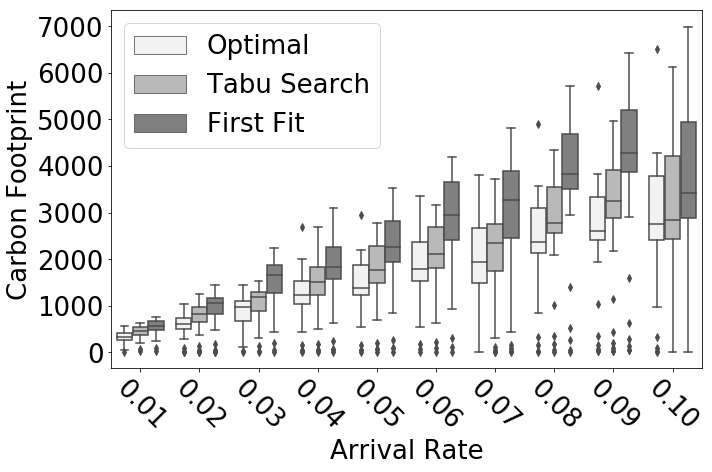

In [9]:
fig, ax = plt.subplots()
ax = sns.boxplot(x="Arrival Rate", y="carbon_footprint", 
                 hue="Optimizer", hue_order=['Optimal', 'Tabu Search', 'First Fit'], 
                 data=ar_df, color="0.5")
set_font_size(ax)
plt.xticks(rotation=-45)
ax.set_ylabel('Carbon Footprint')
plt.tight_layout()

In [10]:
fig.savefig('7170_carbon_footprint.pdf', dpi=1200)

In [11]:
as_number = '7170'
sfc_duration = '3600'
opt_name = {'c':'Optimal', 't':'Tabu Search', 'f':'First Fit'}
for opt in opt_name.keys():
    for ar in range(1, 11):
        arrival_rate = '{:4.2f}'.format(ar*0.01)
        run_id = opt + '_' + as_number + '_' + arrival_rate + '_' + sfc_duration
        df_id = run_id.replace('.', '_')
        cdf_id = ('c_' + as_number + '_' + arrival_rate + '_' + sfc_duration).replace('.', '_')
        print(df_id, df_dir[df_id]['carbon_footprint'].mean() / df_dir[cdf_id]['carbon_footprint'].mean())

c_7170_0_01_3600 1.0
c_7170_0_02_3600 1.0
c_7170_0_03_3600 1.0
c_7170_0_04_3600 1.0
c_7170_0_05_3600 1.0
c_7170_0_06_3600 1.0
c_7170_0_07_3600 1.0
c_7170_0_08_3600 1.0
c_7170_0_09_3600 1.0
c_7170_0_10_3600 1.0
f_7170_0_01_3600 1.6694042028445737
f_7170_0_02_3600 1.6277504523935007
f_7170_0_03_3600 1.7129444844514945
f_7170_0_04_3600 1.4780618890683288
f_7170_0_05_3600 1.5223183472197348
f_7170_0_06_3600 1.5555152252655746
f_7170_0_07_3600 1.5727914879990368
f_7170_0_08_3600 1.5584850627529747
f_7170_0_09_3600 1.5686095667318538
f_7170_0_10_3600 1.264228034721428
t_7170_0_01_3600 1.3265559417406967
t_7170_0_02_3600 1.3090318738863345
t_7170_0_03_3600 1.2051097837608469
t_7170_0_04_3600 1.1861851556779057
t_7170_0_05_3600 1.2236744386258944
t_7170_0_06_3600 1.1432722107211477
t_7170_0_07_3600 1.140032155098149
t_7170_0_08_3600 1.1455125417649021
t_7170_0_09_3600 1.1732096727029702
t_7170_0_10_3600 1.0791562888798891


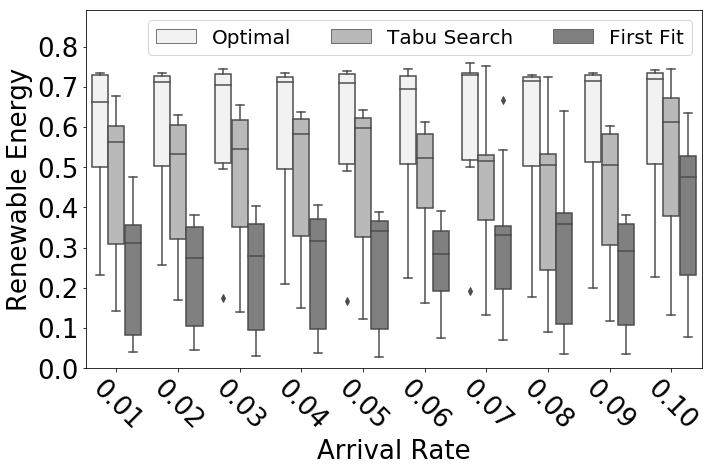

In [12]:
fig, ax = plt.subplots()
ax = sns.boxplot(x="Arrival Rate", y="Renewable Energy", 
                 hue="Optimizer", hue_order=['Optimal', 'Tabu Search', 'First Fit'], 
                 data=ar_df, color="0.5")
set_font_size(ax)
plt.xticks(rotation=-45)
ax.set_ylim(0, 0.89)
plt.legend(loc='upper right', ncol=3, fontsize=20)
plt.tight_layout()

In [13]:
fig.savefig('7170_renewable_energy.pdf', dpi=1200)

In [14]:
as_number = '7170'
sfc_duration = '3600'
opt_name = {'c':'Optimal', 't':'Tabu Search', 'f':'First Fit'}
for opt in opt_name.keys():
    for ar in range(1, 11):
        arrival_rate = '{:4.2f}'.format(ar*0.01)
        run_id = opt + '_' + as_number + '_' + arrival_rate + '_' + sfc_duration
        df_id = run_id.replace('.', '_')
        cdf_id = ('c_' + as_number + '_' + arrival_rate + '_' + sfc_duration).replace('.', '_')
        print(df_id, df_dir[df_id]['Renewable Energy'].mean() / df_dir[cdf_id]['Renewable Energy'].mean())

c_7170_0_01_3600 1.0
c_7170_0_02_3600 1.0
c_7170_0_03_3600 1.0
c_7170_0_04_3600 1.0
c_7170_0_05_3600 1.0
c_7170_0_06_3600 1.0
c_7170_0_07_3600 1.0
c_7170_0_08_3600 1.0
c_7170_0_09_3600 1.0
c_7170_0_10_3600 1.0
f_7170_0_01_3600 0.3976510347316176
f_7170_0_02_3600 0.392780653210347
f_7170_0_03_3600 0.3944016689849142
f_7170_0_04_3600 0.42198058146989914
f_7170_0_05_3600 0.4134051962756342
f_7170_0_06_3600 0.42399784401141893
f_7170_0_07_3600 0.46962960808177795
f_7170_0_08_3600 0.45636112737864715
f_7170_0_09_3600 0.3923941782693783
f_7170_0_10_3600 0.637781025795469
t_7170_0_01_3600 0.7667329949435515
t_7170_0_02_3600 0.7643421357987918
t_7170_0_03_3600 0.783808872110722
t_7170_0_04_3600 0.7934219920744533
t_7170_0_05_3600 0.7911157149045072
t_7170_0_06_3600 0.7696046660246867
t_7170_0_07_3600 0.7231063833904489
t_7170_0_08_3600 0.6723458730353045
t_7170_0_09_3600 0.7173914380094617
t_7170_0_10_3600 0.8509800495689975
